In [77]:
import json
import pandas as pd
from transformers import AutoTokenizer
from datasets import Dataset
import pyarrow as pa
import tensorflow as tf
import seaborn as sns
sns.set_theme(color_codes=True)
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
# from deep_translator import GoogleTranslator
# from pattern.text.en import singularize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder

In [2]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rhjha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhjha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rhjha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [96]:
# Importing the dataset
with open('kampus_merdeka_cmplt.json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata 
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [54]:
# Cetak data baris pertama sampai baris kelima
data.head() 

,patterns,tags
0,hai,greeting
1,punten,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   patterns  605 non-null    object
 1   tags      605 non-null    object
dtypes: object(2)
memory usage: 9.6+ KB


In [56]:
data.describe()

,patterns,tags
count,605,605
unique,600,60
top,Cara mendaftar IISMA?,mitra_IISMA
freq,2,12


In [57]:
data.isnull().sum()

patterns    0
tags        0
dtype: int64

In [58]:
data.isna().sum()

patterns    0
tags        0
dtype: int64

In [59]:
list(set(data.dtypes.tolist()))

[dtype('O')]

In [60]:
data.select_dtypes(include='object').nunique()

patterns    600
tags         60
dtype: int64

## Exploratory Data Analysis 

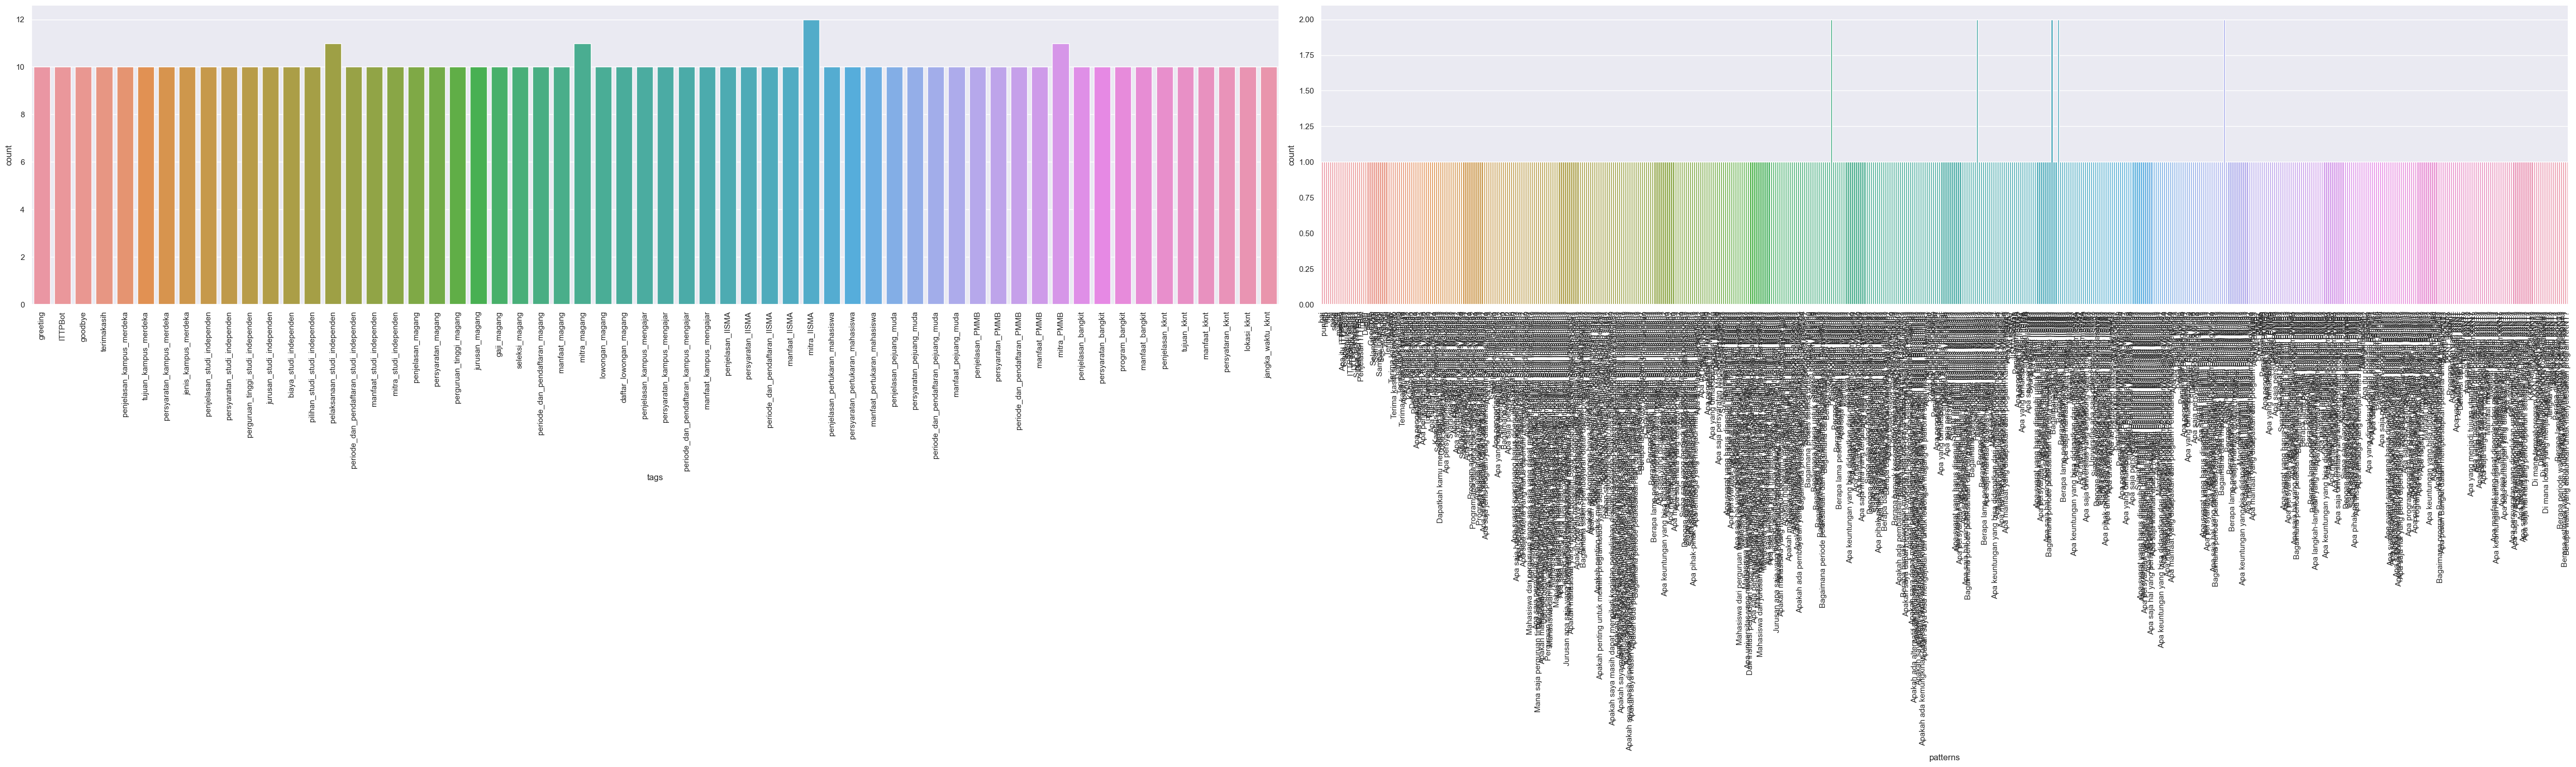

In [66]:
cat_vars = ['tags', 'patterns']

# create figure with subplots
fig, axs = plt.subplots(ncols=2, figsize=(50, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [70]:
print(f"{col}: {data['tags'].unique()}")

tags: ['greeting' 'ITTPBot' 'goodbye' 'terimakasih' 'penjelasan_kampus_merdeka'
 'tujuan_kampus_merdeka' 'persyaratan_kampus_merdeka'
 'jenis_kampus_merdeka' 'penjelasan_studi_independen'
 'persyaratan_studi_independen' 'perguruan_tinggi_studi_independen'
 'jurusan_studi_independen' 'biaya_studi_independen'
 'pilihan_studi_studi_independen' 'pelaksanaan_studi_independen'
 'periode_dan_pendaftaran_studi_independen' 'manfaat_studi_independen'
 'mitra_studi_independen' 'penjelasan_magang' 'persyaratan_magang'
 'perguruan_tinggi_magang' 'jurusan_magang' 'gaji_magang' 'seleksi_magang'
 'periode_dan_pendaftaran_magang' 'manfaat_magang' 'mitra_magang'
 'lowongan_magang' 'daftar_lowongan_magang' 'penjelasan_kampus_mengajar'
 'persyaratan_kampus_mengajar' 'periode_dan_pendaftaran_kampus_mengajar'
 'manfaat_kampus_mengajar' 'penjelasan_IISMA' 'persyaratan_IISMA'
 'periode_dan_pendaftaran_IISMA' 'manfaat_IISMA' 'mitra_IISMA'
 'penjelasan_pertukaran_mahasiswa' 'persyaratan_pertukaran_mahasiswa'
 '

## Word Cloud

In [110]:
# creating the text variable
text_wc = " ".join(title for title in data.patterns)
text_wc

'hai punten halo hei hi pagi siang sore malam permisi Apa itu ITTPBot? Siapa ITTPBot? Kamu siapa? Siapa Kamu? ITTPBot itu siapa? ITTPBot siapa? ITTPBot itu apa? Siapa itu ITTPBot? Defenisi ITTPBot Penjelasan ITTPBot Dah Dadah Bye Byee Good bye Selamat tinggal Sampai jumpa See you Sampai jumpa lagi See you again Thanks Thank you Terima kasih Makasih Terima kasih banyak Terima kasih sudah membantu Makasih banyak Thank you so much Terima kasih banyak ya Terima kasih banyak bantuannya Apa itu Kampus Merdeka? Apa Kampus Merdeka? Kampus Merdeka? Kampus Merdeka adalah Defenisi Kampus Merdeka? Pengertian Kampus Merdeka Apa pengertian dari Kampus Merdeka? Apa defenisi dari Kampus Merdeka? Penjelasan Kampus Merdeka Apa penjelasan dari Kampus Merdeka Apa tujuan Kampus Merdeka? Tujuan Kampus Merdeka adalah Tujuan dari Kampus Merdeka? Apa tujuan dari Kampus Merdeka? Tujuan Kampus Merdeka Kampus Merdeka mempunyai tujuan? Sebutkan tujuan dari Kampus Merdeka? Dapatkah kamu menyebutkan tujuan dari Kamp

In [111]:
# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_wc)
# saving the image
word_cloud.to_file('word-cloud.png')

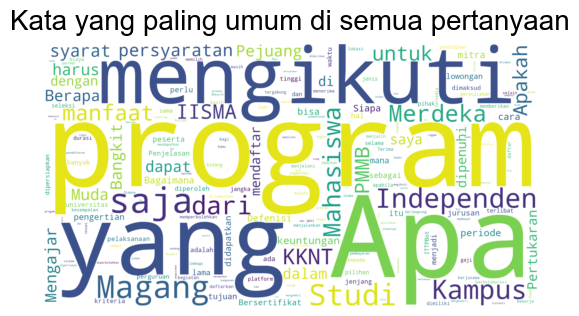

In [117]:
# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.title('Kata yang paling umum di semua pertanyaan',fontdict={'size': 20, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis("off")
plt.show()

## Preprocessing

In [118]:
stop_words = 'stopwordbahasa.csv'

def remove_stopwords(text):

    #Lowercase the text
    text = text.lower()

    #Split the text into words
    words = text.split()

    # Perform stemming
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [119]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\rhjha\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [120]:
data['patterns'] = data['patterns'].apply(remove_stopwords)

In [121]:
X = dict(tokenizer(data['patterns'].to_list(), padding=True, truncation=True, max_length=50, return_tensors='tf'))
y ,unique_label = pd.factorize(data['tags'])

In [122]:
class_names = data['tags'].unique()
class_names

array(['greeting', 'ITTPBot', 'goodbye', 'terimakasih',
       'penjelasan_kampus_merdeka', 'tujuan_kampus_merdeka',
       'persyaratan_kampus_merdeka', 'jenis_kampus_merdeka',
       'penjelasan_studi_independen', 'persyaratan_studi_independen',
       'perguruan_tinggi_studi_independen', 'jurusan_studi_independen',
       'biaya_studi_independen', 'pilihan_studi_studi_independen',
       'pelaksanaan_studi_independen',
       'periode_dan_pendaftaran_studi_independen',
       'manfaat_studi_independen', 'mitra_studi_independen',
       'penjelasan_magang', 'persyaratan_magang',
       'perguruan_tinggi_magang', 'jurusan_magang', 'gaji_magang',
       'seleksi_magang', 'periode_dan_pendaftaran_magang',
       'manfaat_magang', 'mitra_magang', 'lowongan_magang',
       'daftar_lowongan_magang', 'penjelasan_kampus_mengajar',
       'persyaratan_kampus_mengajar',
       'periode_dan_pendaftaran_kampus_mengajar',
       'manfaat_kampus_mengajar', 'penjelasan_IISMA', 'persyaratan_IISMA',


In [123]:
# Define a TensorFlow model
model = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(class_names))

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [124]:
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import losses

In [133]:
# Train the TensorFlow model on the dataset
model.compile(
    optimizer=optimizers.Adam(learning_rate=5e-5),
    loss=model.hf_compute_loss,
    metrics=['accuracy']
)

In [134]:
model.fit(X, y, epochs=5)

Epoch 1/15


ResourceExhaustedError: in user code:

    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\transformers\modeling_tf_utils.py", line 1611, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 579, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 695, in apply_gradients
        self._create_all_weights(var_list)
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 959, in _create_all_weights
        self._create_slots(var_list)
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\optimizers\optimizer_v2\adam.py", line 126, in _create_slots
        self.add_slot(var, "m")
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 1050, in add_slot
        weight = tf.Variable(
    File "C:\Users\rhjha\anaconda3\envs\tf2.11\lib\site-packages\keras\initializers\initializers_v2.py", line 171, in __call__
        return tf.zeros(shape, dtype)

    ResourceExhaustedError: {{function_node __wrapped__Fill_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[30522,768] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]


In [ ]:
saved_directory = 'model'

tokenizer.save_pretrained(saved_directory)
model.save_pretrained(saved_directory)